<h1 style="text-align:center; font-size:40px; color:black;"> Telco Customer Churn Prediction </h1>

<h1 style="font-size:32px;"> 📖 Project Summary </h1>

The Telco Customer Churn project focuses on understanding why customers leave a telecommunications company. Customer churn is a major problem for companies because keeping existing customers is usually cheaper than getting new ones. In this project, I use a dataset provided by IBM that contains information about 7,043 customers of a fictional telecom company in California.

The goal of this project is to analyze customer behavior and identify patterns that lead to churn. By doing this, companies can create strategies to retain customers, improve services, and target the right offers to the right people. This project also helps us understand how predictive models can be applied to real-world business problems.

# 📊 Customer Churn Prediction - EDA & Data Cleaning

This notebook focuses on exploring the Telco Customer Churn dataset and preparing it for machine learning modeling. The goal is to ensure data quality, understand feature distributions, and handle any necessary cleaning steps before moving to model building.

📌 For details on model training and evaluation, please refer to the Modeling notebook.

This notebook will focus on:

- Checking dataset structure and data types
- Handling missing values and potential duplicates
- Exploring target variable distribution (churn vs non-churn)
- Examining feature distributions and relationships
- Preparing a cleaned dataset ready for modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 👀 Explore the Data

In [2]:
customers = pd.read_csv('Telco_Customer_Churn.csv')
customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- ### Basic Info About the Data

In [3]:
# Shape of dataset (rows, columns)
print(customers.shape)

(7043, 21)


In [4]:
# Quick info about data types and null values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- ### Check for Missing Values

In [5]:
# Count missing values in each column
customers.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 🧹 Data Cleaning

- ### `TotalCharges`

In [6]:
# Convert TotalCharges to numeric
customers['TotalCharges'] = pd.to_numeric(customers['TotalCharges'], errors='coerce')

In [7]:
# Check how many rows became NaN
print("Number of nulls in TotalCharges:", customers['TotalCharges'].isnull().sum())

# Show the rows with null TotalCharges
null_totalcharges_rows = customers[customers['TotalCharges'].isnull()]
null_totalcharges_rows

Number of nulls in TotalCharges: 11


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


---

These 11 null TotalCharges rows all have tenure = 0, so fill with 0.

In [8]:
customers['TotalCharges'] = customers['TotalCharges'].fillna(0)
customers['TotalCharges'].isnull().sum()

0

- ### Check categorical columns for inconsistencies

Look for extra spaces, inconsistent capitalization, or typos. Standardize by stripping spaces.

In [9]:
categorical_cols = customers.select_dtypes(include=['object']).columns

summary = []
for col in categorical_cols:
    unique_vals = customers[col].unique()
    summary.append({
        "Column": col,
        "Unique Values": unique_vals,
        "Count of Unique": len(unique_vals)
    })
categorical_summary = pd.DataFrame(summary)
categorical_summary

,Column,Unique Values,Count of Unique
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043
1,gender,"[Female, Male]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,PhoneService,"[No, Yes]",2
5,MultipleLines,"[No phone service, No, Yes]",3
6,InternetService,"[DSL, Fiber optic, No]",3
7,OnlineSecurity,"[No, Yes, No internet service]",3
8,OnlineBackup,"[Yes, No, No internet service]",3
9,DeviceProtection,"[No, Yes, No internet service]",3


--- 
#### Drop customerID
`customerID` is unique and not useful for analysis, so it is dropped.

In [10]:
customers = customers.drop('customerID', axis=1)

- ### Check for impossible values

To ensures that numeric features have reasonable values.

In [11]:
# Count rows with tenure < 0
print("Count of `tenure` < 0:", (customers['tenure'] < 0).sum())

# Count rows with MonthlyCharges <= 0
print("Count of `MonthlyCharges` <= 0:", (customers['MonthlyCharges'] <= 0).sum())

# Count rows with TotalCharges < 0
print("Count of `TotalCharges` < 0:", (customers['TotalCharges'] < 0).sum())

Count of `tenure` < 0: 0
Count of `MonthlyCharges` <= 0: 0
Count of `TotalCharges` < 0: 0


---

All numeric columns have __valid values__.

# 📊 Exploratory Data Analysis (EDA)

- ### Explore Target Column ("Churn")

To check how many customers stayed vs. left.

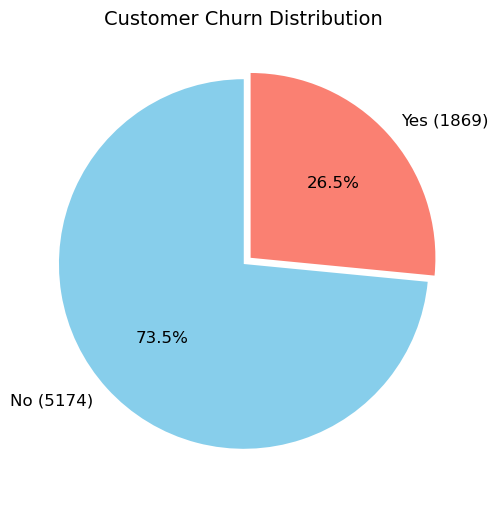

In [12]:
# Count churn values
churn_counts = customers['Churn'].value_counts()

labels = [f"{label} ({count})" for label, count in zip(churn_counts.index, churn_counts.values)]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(churn_counts, 
        labels=labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['skyblue','salmon'], 
        explode=(0,0.05),  
        textprops={'fontsize': 12})

plt.title("Customer Churn Distribution", fontsize=14)
plt.show()

--- 
The dataset is imbalanced. This should be considered in modeling later (using stratified sampling or balancing techniques).

- No = 0.7346 (73.46%) -> About 73% of customers did NOT churn (they stayed).

- Yes = 0.2654 (26.54%) -> About 26% of customers churned (they left).

- ### Numeric Feature Distributions


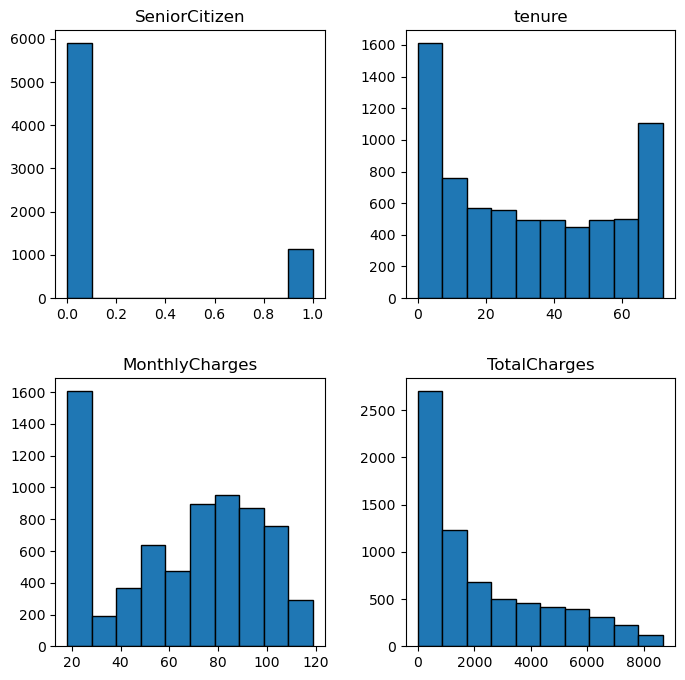

In [13]:
_ = customers.hist(figsize=(8, 8),edgecolor='black', grid = False)

--- 
- `tenure` and `TotalCharges` skew indicates new vs long-term customers, which may impact churn.
- Right-skewed numeric features could benefit from scaling or transformation before modeling.

- ### Categorical Feature Distributions

Visualize how many customers fall into each category for categorical columns.

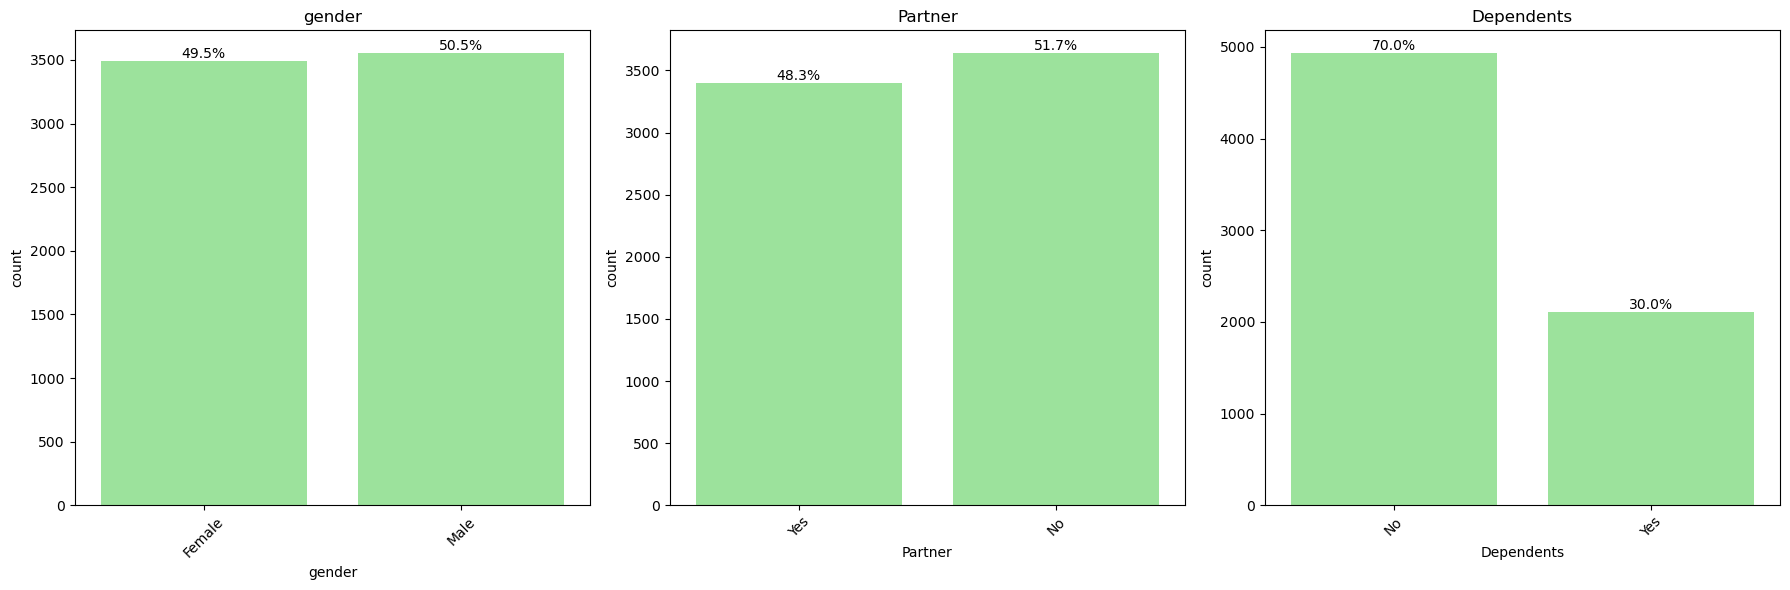

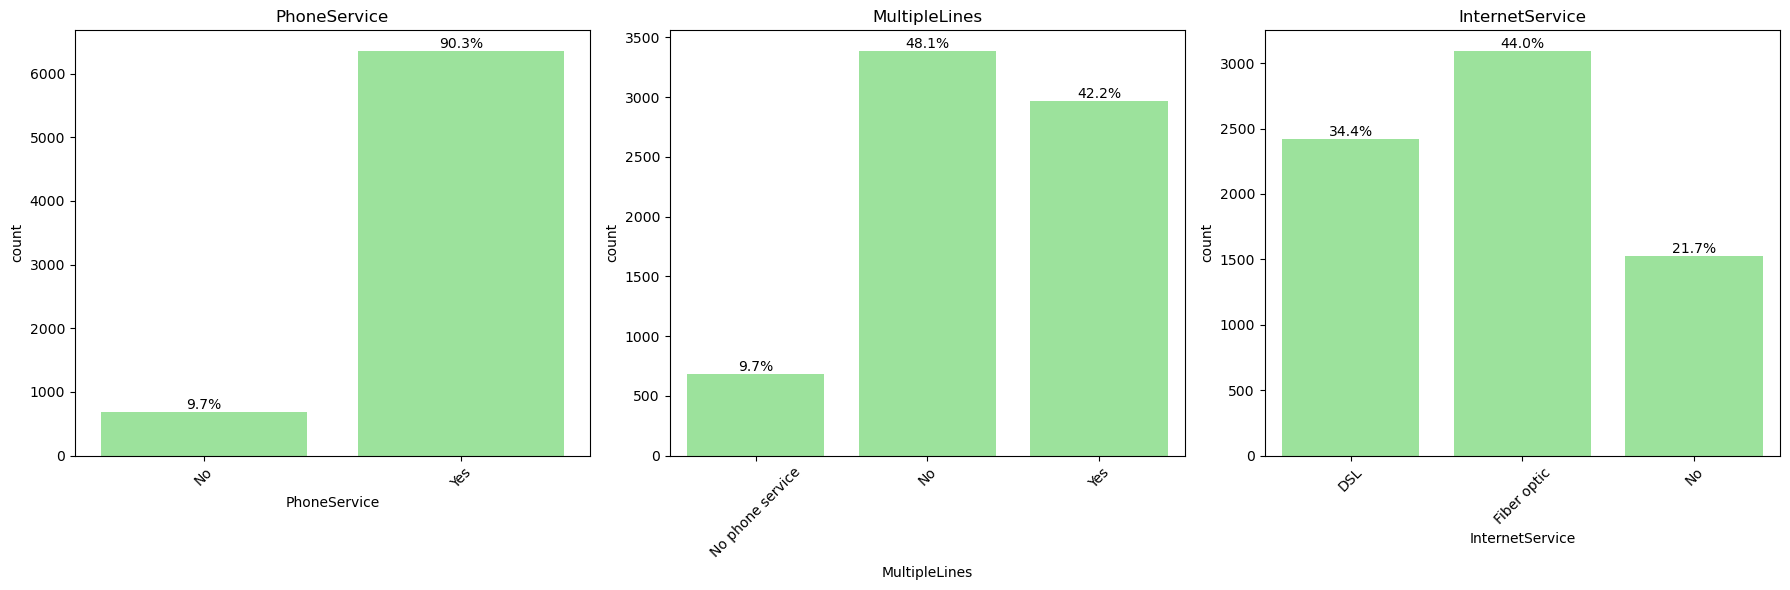

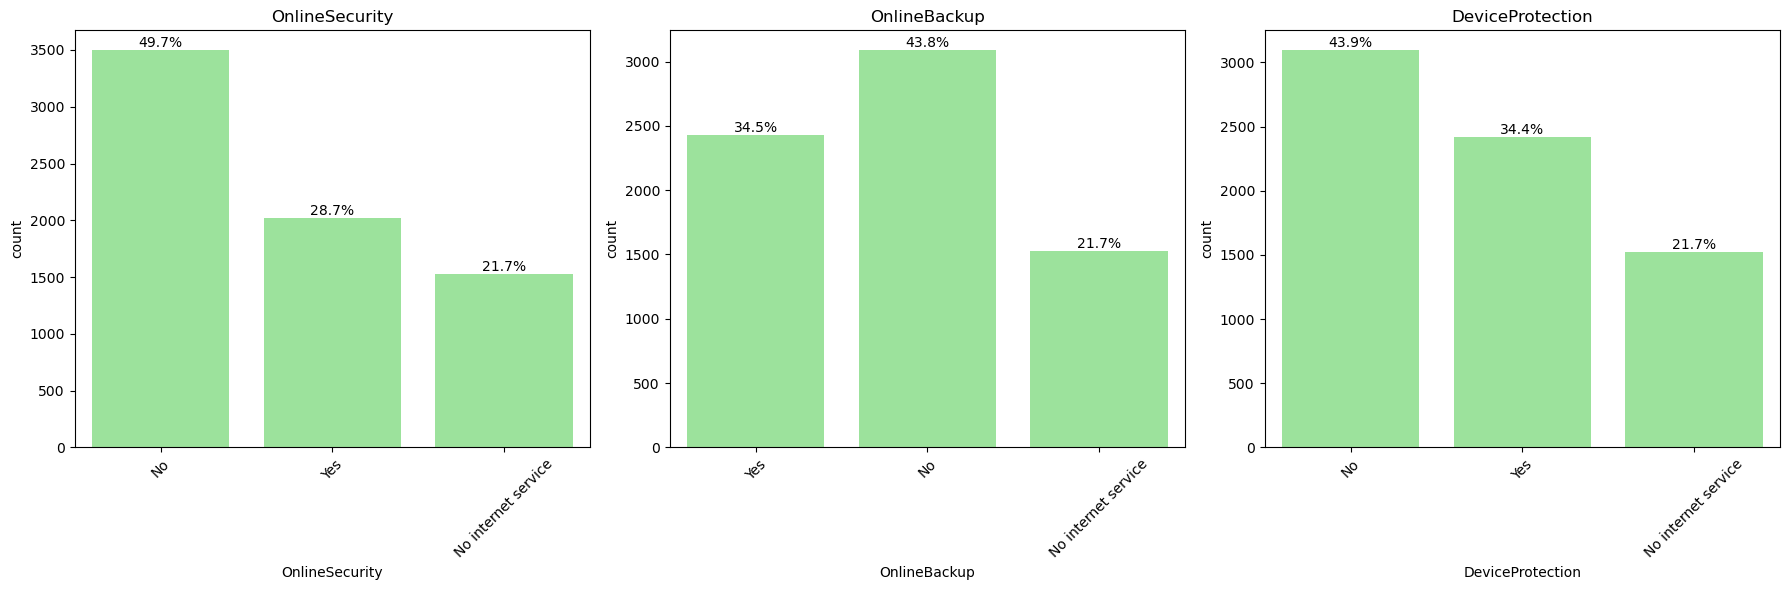

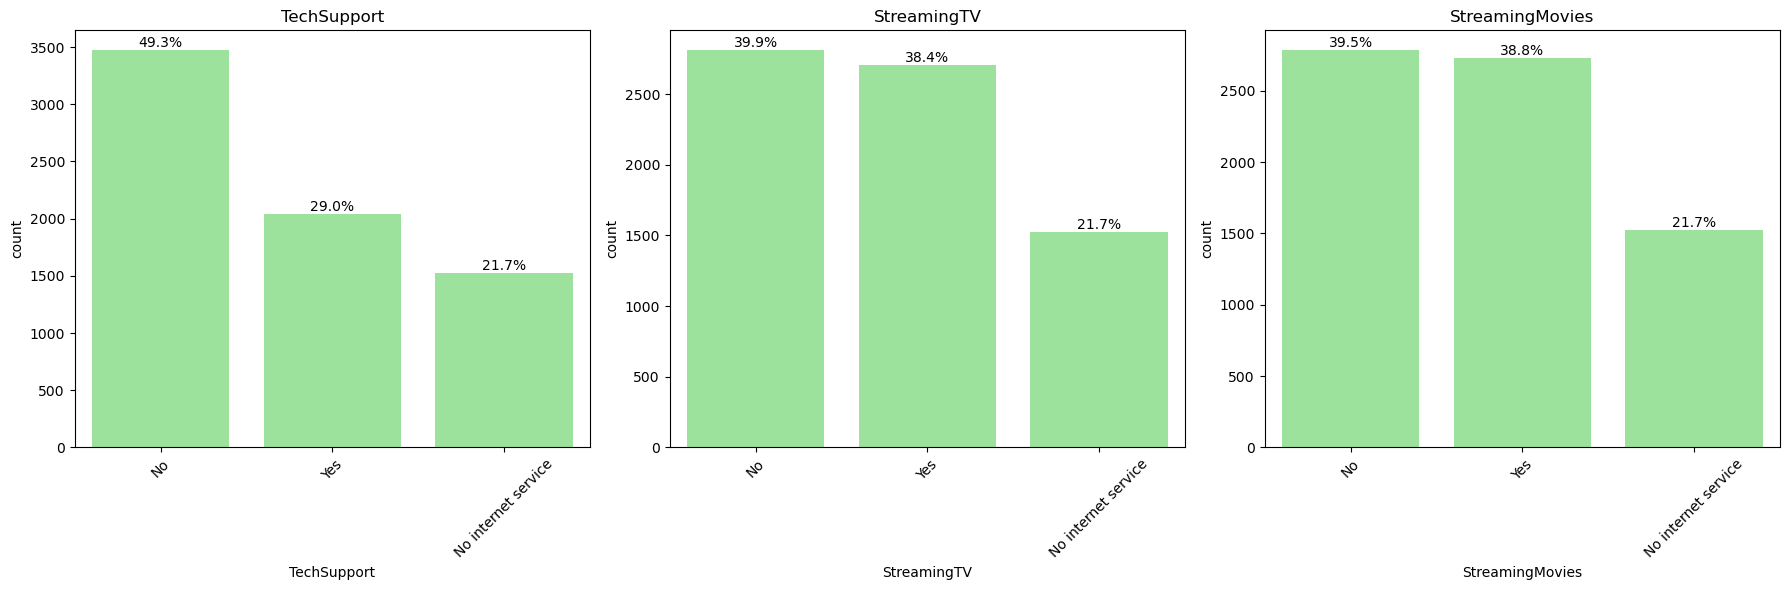

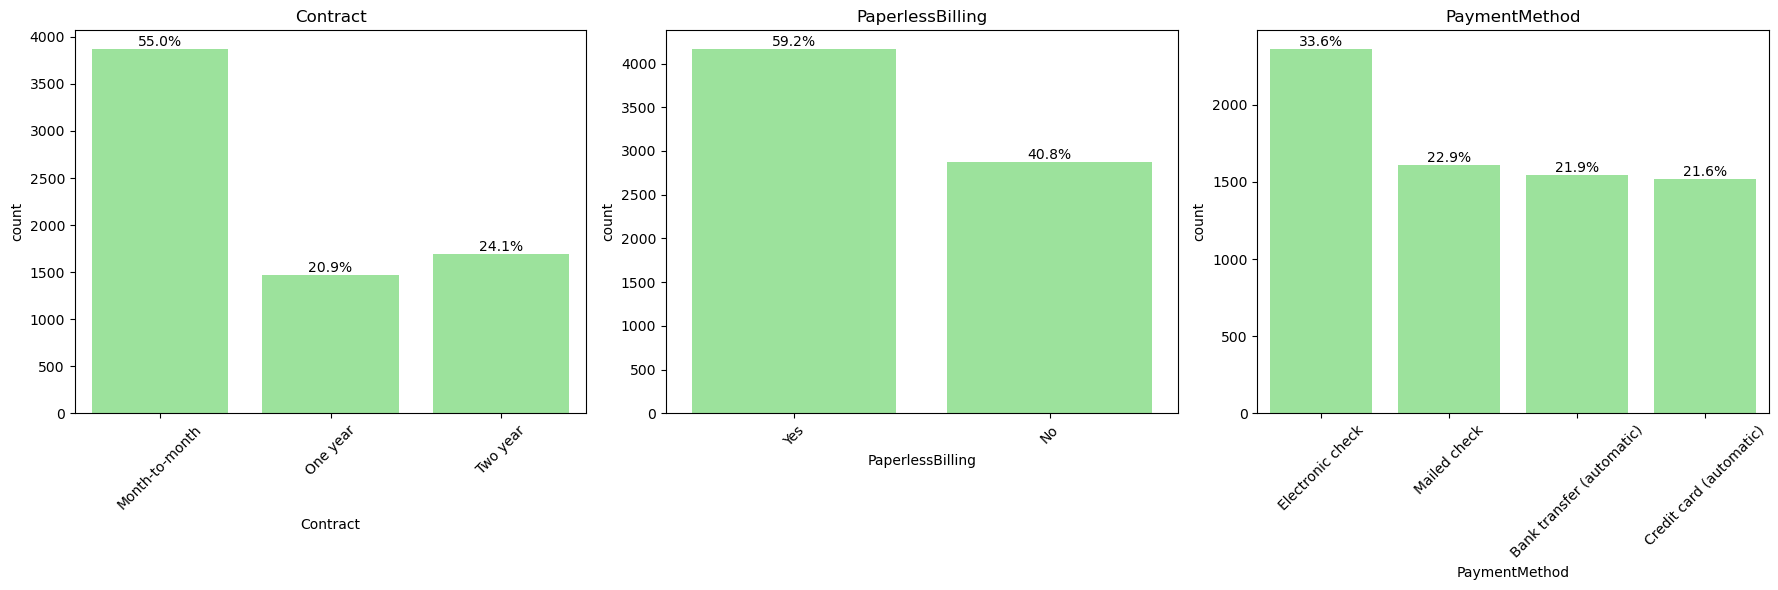

In [14]:
categorical_cols = customers.select_dtypes(include=['object']).columns.drop('Churn')

for i in range(0, len(categorical_cols), 3):
    subset = categorical_cols[i:i+3]
    fig, axes = plt.subplots(1, len(subset), figsize=(18,6))
    
    for j, col in enumerate(subset):
        ax = axes[j]
        # Plot countplot
        sns.countplot(data=customers, x=col, color = 'lightgreen', ax=ax)
        ax.set_title(col)
        ax.tick_params(axis='x', rotation=45)
        
        # Add percentages on top of each bar
        total = len(customers)
        for p in ax.patches:
            height = p.get_height()
            percent = height / total * 100
            ax.annotate(f'{percent:.1f}%', 
                        (p.get_x() + p.get_width()/2., height),
                        ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()


- ### Correlation Analysis
Check correlation among numeric features and with churn.
Convert Churn to numeric (Yes=1, No=0) to include in correlation matrix.

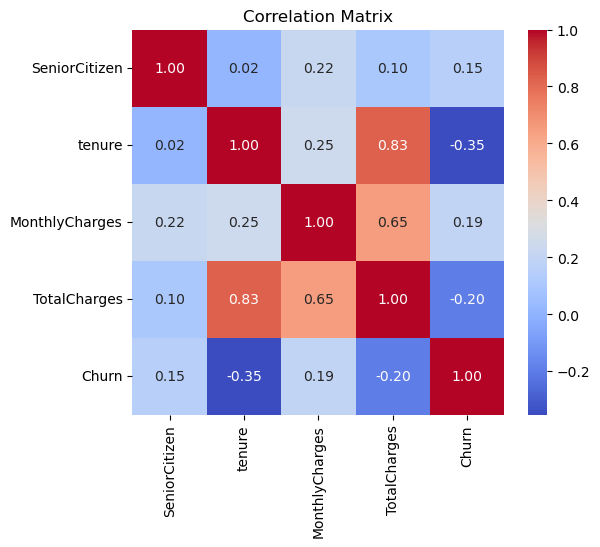

In [15]:
# Convert Churn to numeric
customers['Churn'] = customers['Churn'].map({'No':0, 'Yes':1})

# Select numeric columns including Churn
num_cols = customers.select_dtypes(include=['int64', 'float64']).columns

# Correlation matrix
corr = customers[num_cols].corr()

# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

---

#### Correlation Findings

* Tenure (-0.35): Shorter-tenured customers are more likely to churn.
* MonthlyCharges (0.19): Higher monthly fees slightly increase churn risk.
* TotalCharges (-0.20): Customers with lower total charges (usually new) are more likely to churn.
* SeniorCitizen (0.15): Slightly higher churn among senior customers.

**Key insight:** New customers with higher monthly charges are at the highest risk of churn.

- ### Churn Analysis by Categorical Features




Churn % by gender:

Churn       0      1
gender              
Female  73.08  26.92
Male    73.84  26.16


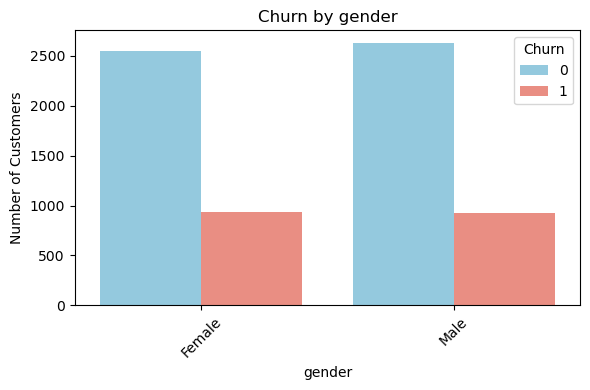


Churn % by Partner:

Churn        0      1
Partner              
No       67.04  32.96
Yes      80.34  19.66


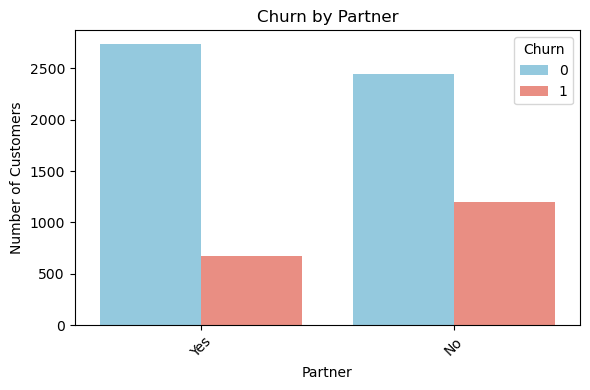


Churn % by Dependents:

Churn           0      1
Dependents              
No          68.72  31.28
Yes         84.55  15.45


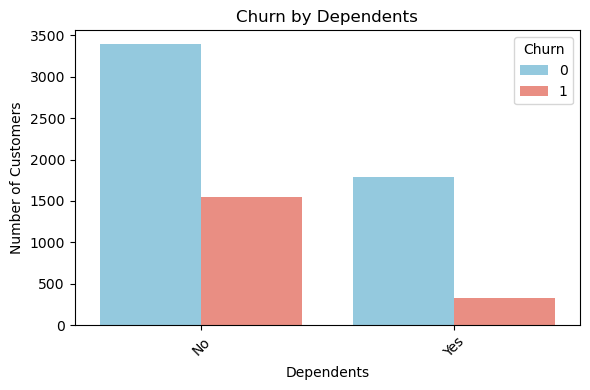


Churn % by PhoneService:

Churn             0      1
PhoneService              
No            75.07  24.93
Yes           73.29  26.71


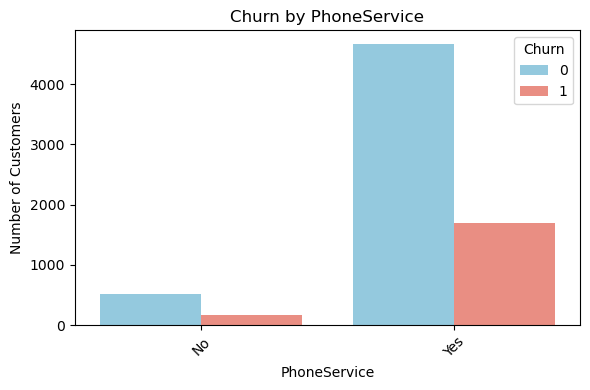


Churn % by MultipleLines:

Churn                 0      1
MultipleLines                 
No                74.96  25.04
No phone service  75.07  24.93
Yes               71.39  28.61


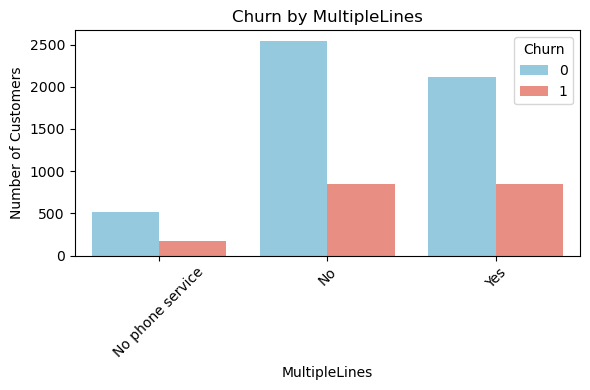


Churn % by InternetService:

Churn                0      1
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40


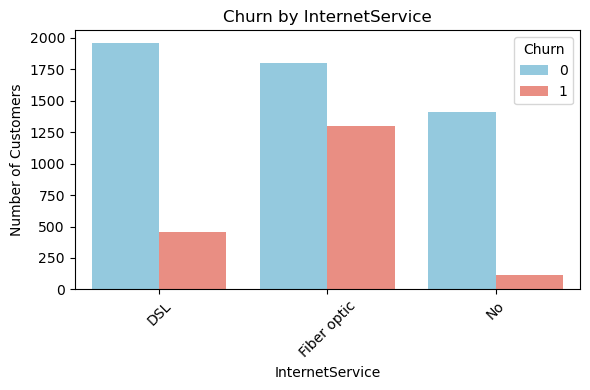


Churn % by OnlineSecurity:

Churn                    0      1
OnlineSecurity                   
No                   58.23  41.77
No internet service  92.60   7.40
Yes                  85.39  14.61


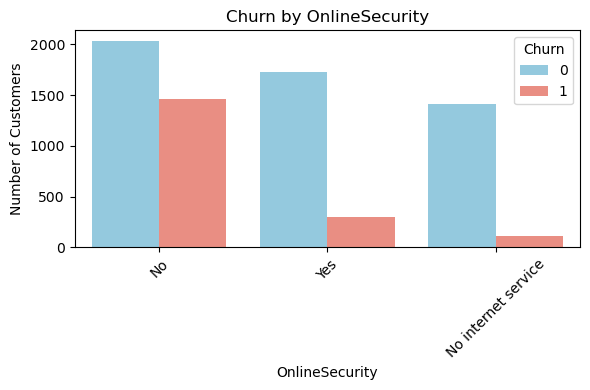


Churn % by OnlineBackup:

Churn                    0      1
OnlineBackup                     
No                   60.07  39.93
No internet service  92.60   7.40
Yes                  78.47  21.53


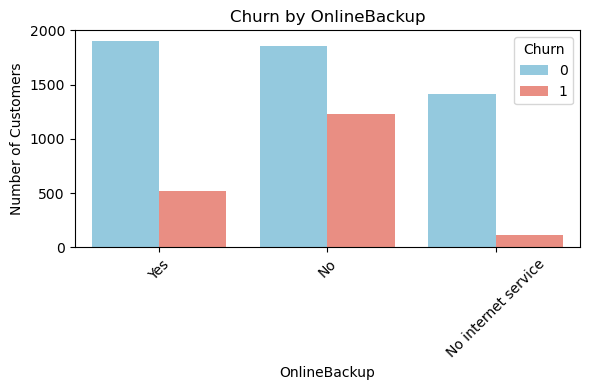


Churn % by DeviceProtection:

Churn                    0      1
DeviceProtection                 
No                   60.87  39.13
No internet service  92.60   7.40
Yes                  77.50  22.50


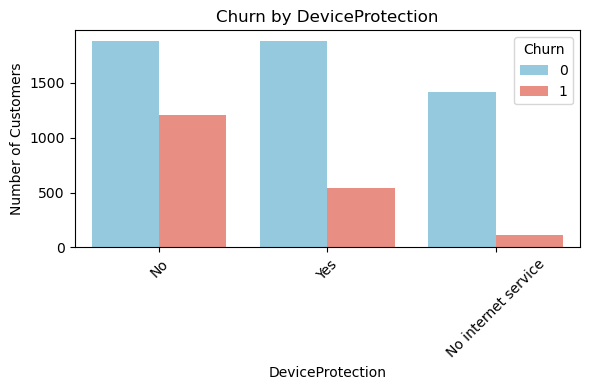


Churn % by TechSupport:

Churn                    0      1
TechSupport                      
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17


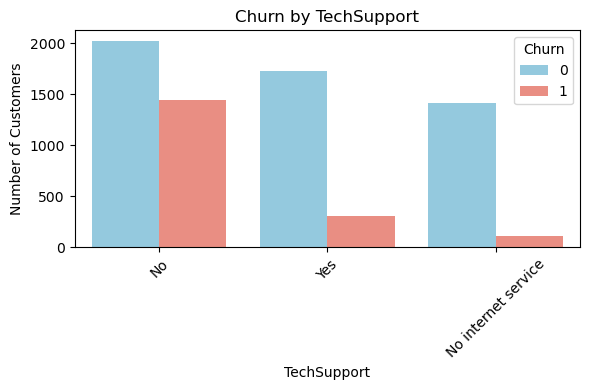


Churn % by StreamingTV:

Churn                    0      1
StreamingTV                      
No                   66.48  33.52
No internet service  92.60   7.40
Yes                  69.93  30.07


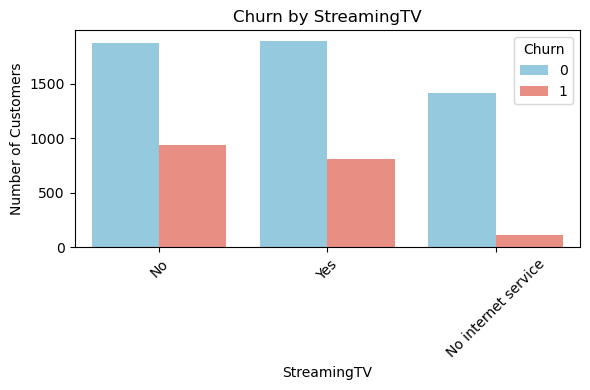


Churn % by StreamingMovies:

Churn                    0      1
StreamingMovies                  
No                   66.32  33.68
No internet service  92.60   7.40
Yes                  70.06  29.94


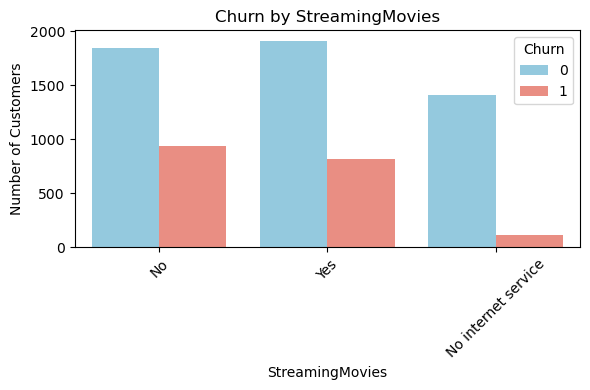


Churn % by Contract:

Churn               0      1
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83


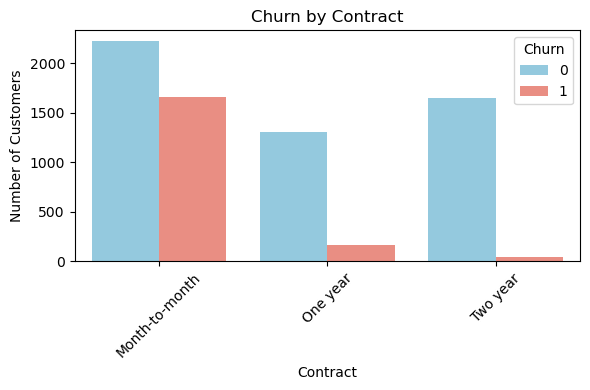


Churn % by PaperlessBilling:

Churn                 0      1
PaperlessBilling              
No                83.67  16.33
Yes               66.43  33.57


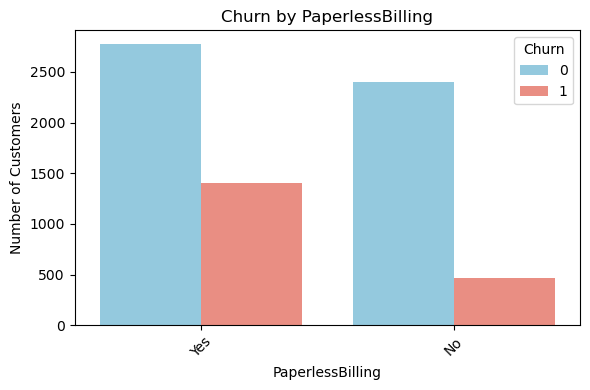


Churn % by PaymentMethod:

Churn                          0      1
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11


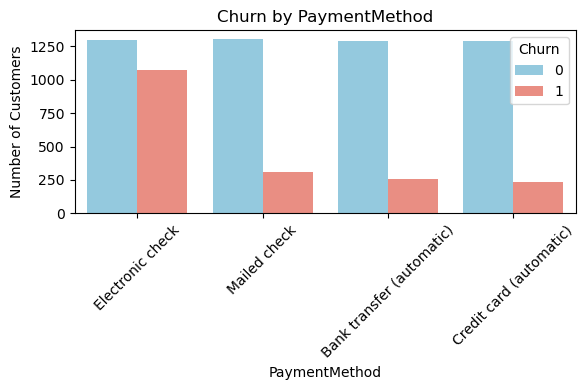

In [16]:
categorical_cols = customers.select_dtypes(include=['object'])

for col in categorical_cols:
    # Churn percentage table
    churn_table = pd.crosstab(customers[col], customers['Churn'], normalize='index') * 100
    print(f"\nChurn % by {col}:\n")
    print(churn_table.round(2))
    
    # Bar plot
    plt.figure(figsize=(6,4))
    sns.countplot(data=customers, x=col, hue='Churn', palette=['skyblue','salmon'])
    plt.title(f'Churn by {col}')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 💾 Export Cleaned Data for Modeling

In [17]:
# Check dataframe info before saving
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
customers.to_csv('Telco_Customer_Churn_Cleaned.csv', index=False)

print("\n✅ Cleaned dataset exported as 'Telco_Customer_Churn_Cleaned.csv'")


✅ Cleaned dataset exported as 'Telco_Customer_Churn_Cleaned.csv'
